**-----------------Data loading----------------------**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.preprocessing import standardize
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
myocardial_infarction_complications = fetch_ucirepo(id=579)

# data (as pandas dataframes)
X = myocardial_infarction_complications.data.features
y = myocardial_infarction_complications.data.targets

# metadata
print(myocardial_infarction_complications.metadata)

# variable information
print(myocardial_infarction_complications.variables)


{'uci_id': 579, 'name': 'Myocardial infarction complications', 'repository_url': 'https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications', 'data_url': 'https://archive.ics.uci.edu/static/public/579/data.csv', 'abstract': 'Prediction of myocardial infarction complications', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1700, 'num_features': 111, 'feature_types': ['Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C53P5M', 'creators': ['S.E. Golovenkin', 'V.A. Shulman', 'D.A. Rossiev', 'P.A. Shesternya', 'S.Yu. Nikulina', 'Yu.V. Orlova', 'V.F. Voino-Yasenetsky'], 'intro_paper': {'tit

In [ ]:
X.head(10)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,64.0,1,0.0,1.0,2.0,1.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
6,70.0,1,1.0,1.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
7,65.0,1,0.0,1.0,1.0,2.0,NaN,2.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
8,60.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
9,77.0,0,2.0,0.0,0.0,0.0,NaN,3.0,0.0,6.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X.isnull().sum()
nan_counts = X.isnull().sum()
print(nan_counts)

AGE             8
SEX             0
INF_ANAM        4
STENOK_AN     106
FK_STENOK      73
             ... 
ANT_CA_S_n     13
GEPAR_S_n      17
ASP_S_n        17
TIKL_S_n       16
TRENT_S_n      16
Length: 111, dtype: int64


In [ ]:
# Concatenate X and y along columns (axis=1)
data = pd.concat([X, y], axis=1)

# Now merged_data contains both features (X) and targets (y) in one DataFrame
print(data.head())

    AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  DLIT_AG  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
0         0.0      7.0  ...          0           0         0          0   
1         0.0      0.0  ...          0           0         0          0   
2         0.0      2.0  ...          0           0         0          0   
3         0.0      3.0  ...          0           0         0          0   
4         0.0      7.0  ...          0           0         0          0   

   RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0       0         0    0       0          0       0  
1 

In [ ]:
#create a dictionary feature name : number of nan
tot = []
for val in data.isnull().sum():
    tot.append(val)
nan = { k : v for k,v in zip(data.columns, tot)}
nan

{'AGE': 8,
 'SEX': 0,
 'INF_ANAM': 4,
 'STENOK_AN': 106,
 'FK_STENOK': 73,
 'IBS_POST': 51,
 'IBS_NASL': 1628,
 'GB': 9,
 'SIM_GIPERT': 8,
 'DLIT_AG': 248,
 'ZSN_A': 54,
 'nr_11': 21,
 'nr_01': 21,
 'nr_02': 21,
 'nr_03': 21,
 'nr_04': 21,
 'nr_07': 21,
 'nr_08': 21,
 'np_01': 18,
 'np_04': 18,
 'np_05': 18,
 'np_07': 18,
 'np_08': 18,
 'np_09': 18,
 'np_10': 18,
 'endocr_01': 11,
 'endocr_02': 10,
 'endocr_03': 10,
 'zab_leg_01': 7,
 'zab_leg_02': 7,
 'zab_leg_03': 7,
 'zab_leg_04': 7,
 'zab_leg_06': 7,
 'S_AD_KBRIG': 1076,
 'D_AD_KBRIG': 1076,
 'S_AD_ORIT': 267,
 'D_AD_ORIT': 267,
 'O_L_POST': 12,
 'K_SH_POST': 15,
 'MP_TP_POST': 14,
 'SVT_POST': 12,
 'GT_POST': 12,
 'FIB_G_POST': 12,
 'ant_im': 83,
 'lat_im': 80,
 'inf_im': 80,
 'post_im': 72,
 'IM_PG_P': 1,
 'ritm_ecg_p_01': 152,
 'ritm_ecg_p_02': 152,
 'ritm_ecg_p_04': 152,
 'ritm_ecg_p_06': 152,
 'ritm_ecg_p_07': 152,
 'ritm_ecg_p_08': 152,
 'n_r_ecg_p_01': 115,
 'n_r_ecg_p_02': 115,
 'n_r_ecg_p_03': 115,
 'n_r_ecg_p_04': 115,
 '

**--------------Dealing with Missing values----------------------**

In [ ]:
data.isnull().sum()

AGE            8
SEX            0
INF_ANAM       4
STENOK_AN    106
FK_STENOK     73
            ... 
DRESSLER       0
ZSN            0
REC_IM         0
P_IM_STEN      0
LET_IS         0
Length: 123, dtype: int64

In [ ]:
data.tail(10)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
1690,77.0,1,0.0,0.0,0.0,0.0,NaN,2.0,0.0,NaN,...,0,0,1,0,1,0,0,0,0,3
1691,62.0,1,0.0,0.0,0.0,0.0,NaN,0.0,1.0,7.0,...,0,0,0,0,1,0,0,0,0,3
1692,71.0,0,0.0,6.0,2.0,2.0,NaN,2.0,0.0,7.0,...,0,0,0,0,1,0,0,1,0,3
1693,70.0,0,0.0,2.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0,0,0,0,1,0,0,0,0,3
1694,77.0,0,0.0,0.0,0.0,0.0,NaN,2.0,0.0,7.0,...,0,0,0,0,1,0,0,0,0,3
1695,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0,0,1,0,1,0,0,0,0,3
1696,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,1
1697,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0,0,0,1,0,0,0,0,0,1
1699,63.0,1,2.0,NaN,NaN,NaN,NaN,2.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Define the columns for which you want to replace NaN values with mean
columns_to_impute = ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB',
                     'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03',
                     'nr_04', 'nr_07', 'np_04', 'endocr_01', 'zab_leg_01', 'S_AD_ORIT',
                     'O_L_POST', 'K_SH_POST', 'ant_im', 'IM_PG_P', 'ritm_ecg_p_01',
                     'n_r_ecg_p_06', 'fibr_ter_01', 'GIPER_NA', 'inf_im', 'n_p_ecg_p_01',
                     'GIPO_K', 'K_BLOOD', 'ALT_BLOOD', 'L_BLOOD', 'ROE', 'NA_R_3_n',
                     'GEPAR_S_n', 'AST_BLOOD', 'TIME_B_S', 'R_AB_2_n', 'LID_S_n',
                     'ANT_CA_S_n', 'R_AB_3_n', 'lat_im','IBS_NASL', 'S_AD_KBRIG', 'D_AD_KBRIG','KFK_BLOOD','NA_KB','NOT_NA_KB','LID_KB','nr_08', 'np_01','np_04', 'np_05','np_07','np_08','np_09','np_10','endocr_02','endocr_03','zab_leg_02',
 'zab_leg_03','zab_leg_04','zab_leg_06','D_AD_ORIT','MP_TP_POST','SVT_POST','GT_POST','FIB_G_POST',
 'post_im','ritm_ecg_p_02','ritm_ecg_p_04','ritm_ecg_p_06','ritm_ecg_p_07','ritm_ecg_p_08','n_r_ecg_p_01','n_r_ecg_p_02','n_r_ecg_p_03','n_r_ecg_p_04',
 'n_r_ecg_p_05','n_r_ecg_p_08','n_r_ecg_p_09','n_r_ecg_p_10','n_p_ecg_p_03',
 'n_p_ecg_p_04' ,'n_p_ecg_p_05' ,'n_p_ecg_p_06' ,'n_p_ecg_p_07' ,'n_p_ecg_p_08' ,'n_p_ecg_p_09' ,'n_p_ecg_p_10' ,'n_p_ecg_p_11' ,'n_p_ecg_p_12' ,
'fibr_ter_02' ,'fibr_ter_03' ,'fibr_ter_05' ,'fibr_ter_06' ,'fibr_ter_07' ,'fibr_ter_08' ,
 'NA_BLOOD','R_AB_1_n','NITR_S','NA_R_1_n','NA_R_2_n','NOT_NA_1_n' ,'NOT_NA_2_n','NOT_NA_3_n','B_BLOK_S_n','ASP_S_n','TIKL_S_n','TRENT_S_n']

# Initialize SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Impute NaN values in specified columns with column means
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

# Now 'data' contains NaN values in specified columns replaced with column means


In [ ]:
data.info(True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 123 columns):
 #    Column         Dtype  
---   ------         -----  
 0    AGE            float64
 1    SEX            float64
 2    INF_ANAM       float64
 3    STENOK_AN      float64
 4    FK_STENOK      float64
 5    IBS_POST       float64
 6    IBS_NASL       float64
 7    GB             float64
 8    SIM_GIPERT     float64
 9    DLIT_AG        float64
 10   ZSN_A          float64
 11   nr_11          float64
 12   nr_01          float64
 13   nr_02          float64
 14   nr_03          float64
 15   nr_04          float64
 16   nr_07          float64
 17   nr_08          float64
 18   np_01          float64
 19   np_04          float64
 20   np_05          float64
 21   np_07          float64
 22   np_08          float64
 23   np_09          float64
 24   np_10          float64
 25   endocr_01      float64
 26   endocr_02      float64
 27   endocr_03      float64
 28   zab_leg_01     f

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.tail(10)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
1690,77.0,1.0,0.0,0.000000,0.000000,0.000000,0.375,2.0,0.0,3.34022,...,0,0,1,0,1,0,0,0,0,3
1691,62.0,1.0,0.0,0.000000,0.000000,0.000000,0.375,0.0,1.0,7.00000,...,0,0,0,0,1,0,0,0,0,3
1692,71.0,0.0,0.0,6.000000,2.000000,2.000000,0.375,2.0,0.0,7.00000,...,0,0,0,0,1,0,0,1,0,3
1693,70.0,0.0,0.0,2.000000,2.000000,1.000000,0.375,2.0,0.0,7.00000,...,0,0,0,0,1,0,0,0,0,3
1694,77.0,0.0,0.0,0.000000,0.000000,0.000000,0.375,2.0,0.0,7.00000,...,0,0,0,0,1,0,0,0,0,3
1695,77.0,0.0,0.0,4.000000,2.000000,1.000000,0.375,2.0,0.0,7.00000,...,0,0,1,0,1,0,0,0,0,3
1696,70.0,0.0,0.0,6.000000,2.000000,1.000000,0.375,2.0,0.0,7.00000,...,0,0,0,0,0,0,0,0,0,1
1697,55.0,1.0,3.0,6.000000,2.000000,2.000000,0.375,0.0,0.0,0.00000,...,0,0,0,0,0,0,0,1,0,6
1698,79.0,0.0,2.0,2.000000,2.000000,1.000000,0.375,2.0,0.0,7.00000,...,0,0,0,1,0,0,0,0,0,1
1699,63.0,1.0,2.0,2.316186,1.205286,1.160703,0.375,2.0,0.0,3.34022,...,0,0,0,0,0,0,0,0,0,1


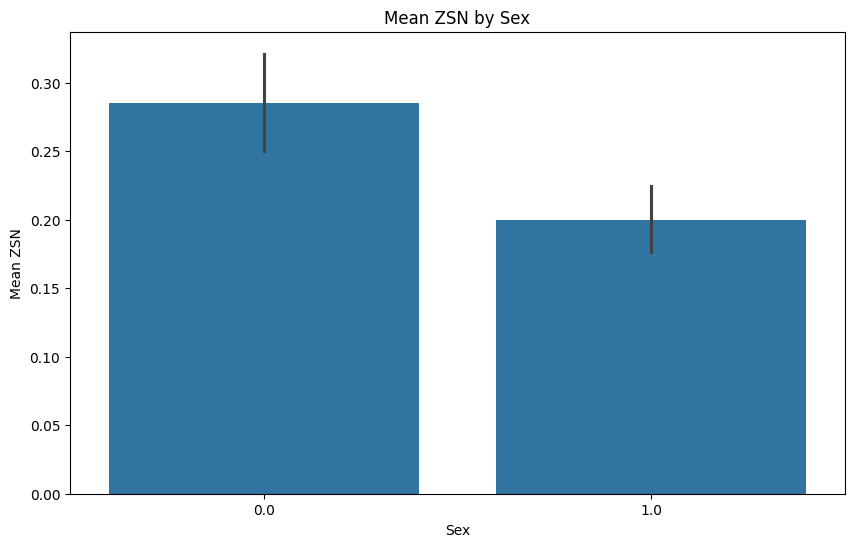

In [ ]:
# Bar plot of mean ZSN by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='SEX', y='ZSN', data=data, estimator=np.mean)
plt.title('Mean ZSN by Sex')
plt.xlabel('Sex')
plt.ylabel('Mean ZSN')
plt.show()


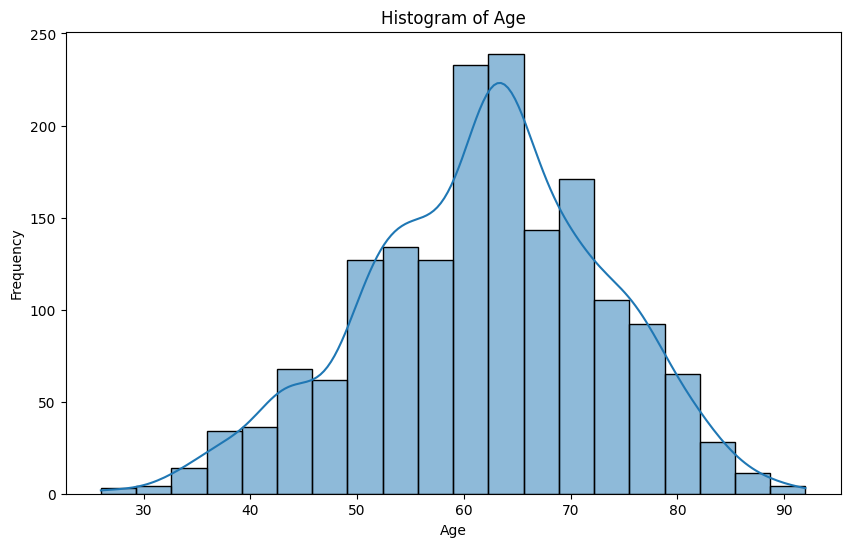

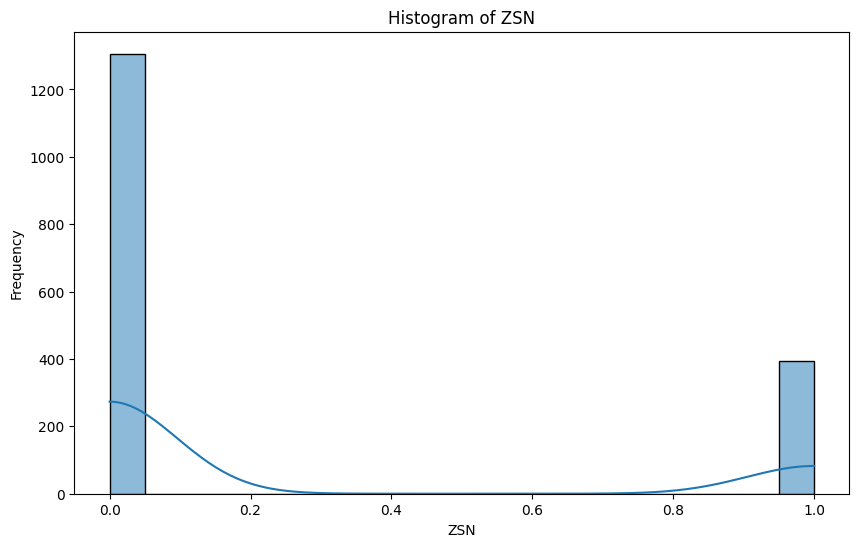

In [ ]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(data['AGE'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram for ZSN
plt.figure(figsize=(10, 6))
sns.histplot(data['ZSN'], bins=20, kde=True)
plt.title('Histogram of ZSN')
plt.xlabel('ZSN')
plt.ylabel('Frequency')
plt.show()


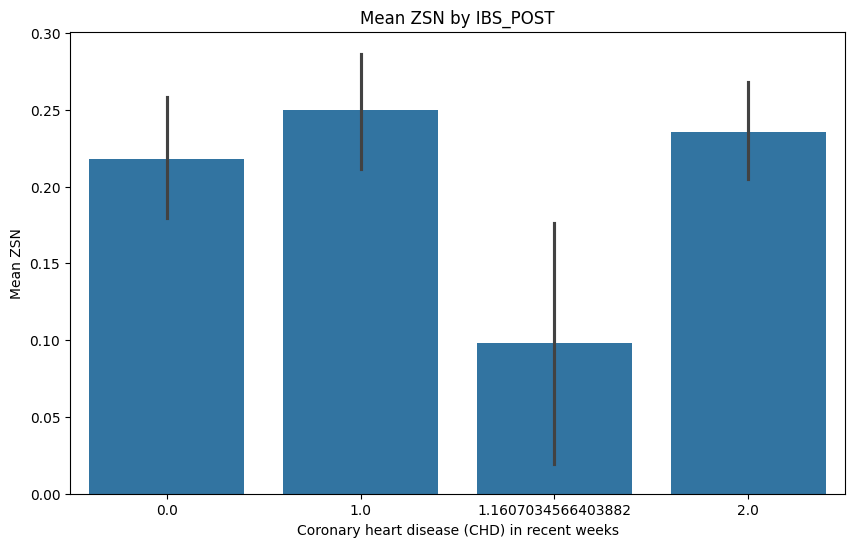

In [ ]:
# Bar plot of mean ZSN by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='IBS_POST', y='ZSN', data=data, estimator=np.mean)
plt.title('Mean ZSN by IBS_POST')
plt.xlabel('Coronary heart disease (CHD) in recent weeks')
plt.ylabel('Mean ZSN')
plt.show()


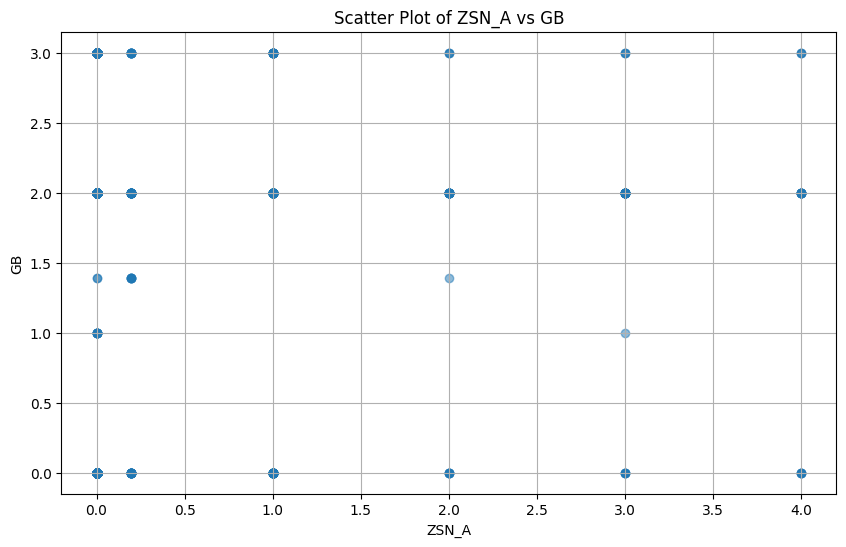

In [ ]:
import matplotlib.pyplot as plt

# Extract ZSN_A and GB columns from the DataFrame
zsn_a = data['ZSN_A']
gb = data['GB']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(zsn_a, gb, alpha=0.5)  # alpha controls transparency of points
plt.title('Scatter Plot of ZSN_A vs GB')
plt.xlabel('ZSN_A')
plt.ylabel('GB')
plt.grid(True)  # Add grid lines for better readability
plt.show()


In [ ]:
datagen = np.random.rand(len(data)) <0.81
train_data = data[datagen]
test_data = data[~datagen]

In [ ]:
train_data.isnull().sum()

AGE          0
SEX          0
INF_ANAM     0
STENOK_AN    0
FK_STENOK    0
            ..
DRESSLER     0
ZSN          0
REC_IM       0
P_IM_STEN    0
LET_IS       0
Length: 123, dtype: int64

In [ ]:
# Check column names in train_data
print("Column names in train_data:", train_data.columns)

# Verify and adjust columns_to_drop if needed
columns_to_drop = [
     'ZSN','ZSN_A'
]

# Filter columns_to_drop to include only existing column names
columns_to_drop = [col for col in columns_to_drop if col in train_data.columns]

# Drop columns from train_data
X_train = train_data.drop(columns_to_drop, axis=1).values
y_train = train_data['ZSN'].values

X_test = test_data.drop(columns_to_drop, axis=1).values
y_test = test_data['ZSN'].values

Column names in train_data: Index(['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST',
       'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG',
       ...
       'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV',
       'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'],
      dtype='object', length=123)


In [ ]:
# Assuming X_train, y_train, X_test, y_test are defined as per your previous code

# Viewing information of y_train
print("Shape of y_train:", y_train.shape)
print("Data type of y_train:", y_train.dtype)
print("Sample values of y_train:", y_train[:10])  # Print first 10 values as an example

# Viewing information of X_train
print("Shape of X_train:", X_train.shape)
print("Data type of X_train:", X_train.dtype)
print("Sample values of X_train:", X_train[:10])  # Print first 10 values as an example


Shape of y_train: (1376,)
Data type of y_train: int64
Sample values of y_train: [0 0 1 0 0 1 0 1 0 0]
Shape of X_train: (1376, 121)
Data type of X_train: float64
Sample values of X_train: [[77.  1.  2. ...  0.  0.  0.]
 [55.  1.  1. ...  0.  0.  0.]
 [68.  0.  0. ...  0.  0.  0.]
 ...
 [77.  0.  2. ...  0.  0.  0.]
 [71.  1.  0. ...  0.  0.  0.]
 [50.  0.  0. ...  1.  0.  0.]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Verify the number of samples in X_train and y_train
if X_train.shape[0] != y_train.shape[0]:
    raise ValueError("Number of samples in X_train and y_train must match.")

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on X_train and transform X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the scaled training data
nb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = nb_classifier.predict(X_test_scaled)
y_pred_train = nb_classifier.predict(X_train_scaled)
# Evaluate accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of  training with Min-Max Scaling:", accuracy_train)
print("Accuracy with Min-Max Scaling:", accuracy)


Accuracy of  training with Min-Max Scaling: 0.3226744186046512
Accuracy with Min-Max Scaling: 0.27469135802469136


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 30 222]
 [ 13  59]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on X_train and transform X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the scaled training data
nb_classifier.fit(X_train_scaled, y_train)

# Adjust classification threshold to reduce false positives
threshold = 0.9  # Adjust the threshold as needed
y_pred_probs = nb_classifier.predict_proba(X_test_scaled)[:, 1]  # Predict probabilities
y_pred_adjusted = (y_pred_probs >= threshold).astype(int)  # Apply threshold

# Evaluate accuracy and precision
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)

print("Accuracy with adjusted threshold:", accuracy)
print("Precision with adjusted threshold:", precision)


Accuracy with adjusted threshold: 0.2716049382716049
Precision with adjusted threshold: 0.20714285714285716


-------Model with Feature selection-------

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Example: Feature selection and Naive Bayes pipeline
feature_selection = SelectKBest(score_func=f_classif, k=10)  # Select top K features
nb_classifier_tuned = GaussianNB()  # Initialize tuned Naive Bayes classifier

# Create a pipeline with feature selection and classifier
pipeline = Pipeline([('feature_selection', feature_selection),
                     ('classifier', nb_classifier_tuned)])

# Fit the pipeline on the scaled training data
pipeline.fit(X_train_scaled, y_train)

# Adjust classification threshold for the pipeline
y_pred_probs_pipe = pipeline.predict_proba(X_test_scaled)[:, 1]  # Predict probabilities
y_pred_adjusted_pipe = (y_pred_probs_pipe >= threshold).astype(int)  # Apply threshold

# Evaluate accuracy and precision
accuracy_pipe = accuracy_score(y_test, y_pred_adjusted_pipe)
precision_pipe = precision_score(y_test, y_pred_adjusted_pipe)

print("Accuracy with adjusted threshold (pipeline):", accuracy_pipe)
print("Precision with adjusted threshold (pipeline):", precision_pipe)


Accuracy with adjusted threshold (pipeline): 0.7530864197530864
Precision with adjusted threshold (pipeline): 0.375


Accuracy: 0.7006172839506173
Precision: 0.2807017543859649
Recall: 0.2222222222222222
F1 Score: 0.24806201550387597


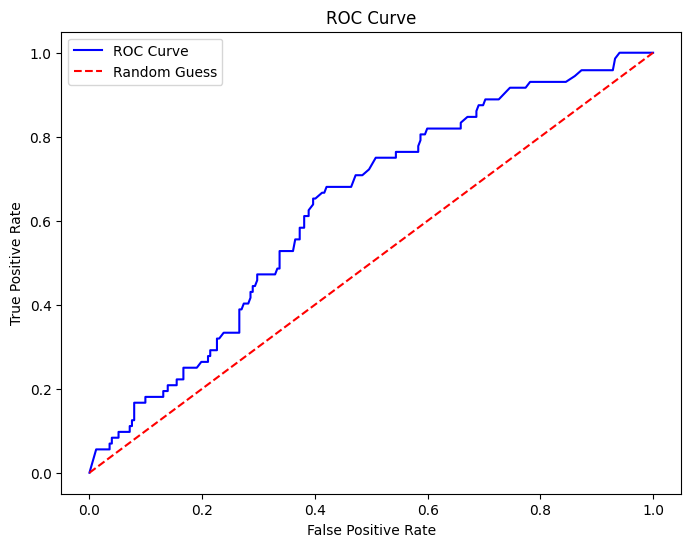

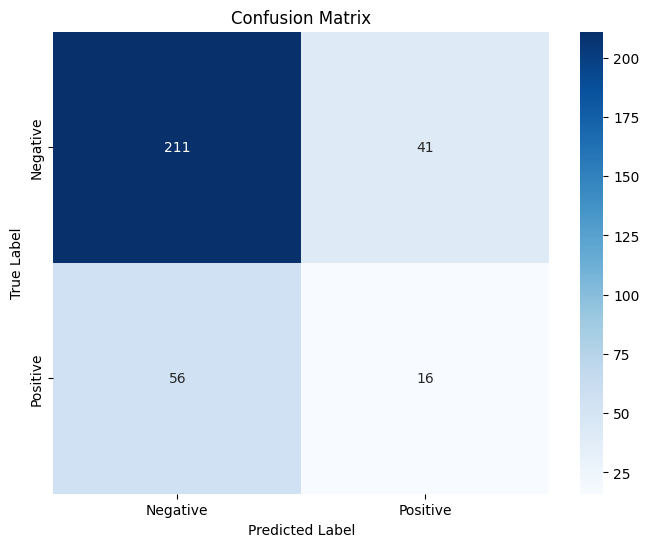

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Predict using the pipeline
y_pred_pipe = pipeline.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_pipe)
precision = precision_score(y_test, y_pred_pipe)
recall = recall_score(y_test, y_pred_pipe)
f1 = f1_score(y_test, y_pred_pipe)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Compute ROC curve
y_pred_probs_pipe = pipeline.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_pipe)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_pipe)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
